# Model Evaluation and Refinement

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('module_5_auto.csv')
df.head(5)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,0,0,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,1,1,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,2,2,1,122,alfa-romero,std,two,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,3,3,2,164,audi,std,four,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,4,4,2,164,audi,std,four,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.to_csv('module_5_auto.csv')

In [4]:
df

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,0,0,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,1,1,3,122,alfa-romero,std,two,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,2,2,1,122,alfa-romero,std,two,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,3,3,2,164,audi,std,four,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,4,4,2,164,audi,std,four,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,196,196,196,196,-1,95,volvo,std,four,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,197,197,197,197,197,-1,95,volvo,turbo,four,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,198,198,198,198,198,-1,95,volvo,std,four,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,199,199,199,199,199,-1,95,volvo,turbo,four,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


Libraries for plotting

In [5]:
from ipywidgets import interact, interactive, fixed,interact_manual

# Functions for Plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 12
    plt.figure = figsize=(width,height)
    
    ax1 = sns.displot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.displot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
    
    plt.title(Title)
    plt.xlabel('Price(in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain,xtest,ytrain,ytest,lr,poly_transform):
    width=12
    height=12
    plt.figure(figsize=(width,height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    
    
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin,xmax,0.1)
    
    plt.plot(xtrain,ytrain,'ro', label='Training Data')
    plt.plot(x_test,y_test,'go', label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Part 1: Training and Testing

An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [8]:
y_data = df['price']

Drop price data in dataframe x_data:

In [9]:
x_data = df.drop('price', axis=1)

Now, we randomly split our data into training and testing data using the function train_test_split.

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.10, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 21
number of training samples: 180


 In the above, the testing set is 10% of the total dataset.

#### Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.40,random_state= 0)

print("Number of test samples:", x_test1.shape[0])
print("Number of train samples:", x_train1.shape[0])

Number of test samples: 81
Number of train samples: 120


Let's import LinearRegression from the module linear_model.

In [12]:
from sklearn.linear_model import LinearRegression

We create a Linear Regression object

In [13]:
lr = LinearRegression()
lr

LinearRegression()

We fit the model using the feature 'horsepower'

In [14]:
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data

In [15]:
lr.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [16]:
lr.score(x_train[['horsepower']], y_train)

0.6619724197515103

We can see that R^2 value of test data is much lesser than that of train data.

### Find the R^2 on the test data using 40% of the dataset for testing.

In [17]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lr.fit(x_train2[['horsepower']], y_train2)
lr.score(x_test[['horsepower']], y_test)

0.40274613112615354

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

## Cross-Validation Score

Let's import model_selection from the module cross_val_score.

In [18]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.

In [19]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

We can calculate the average and standard deviation of our estimate:

In [20]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [21]:
-1 * cross_val_score(lr, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

#### Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [22]:
Rcross1 = cross_val_score(lr,x_data[['horsepower']], y_data , cv=2)
Rcross1.mean()

0.5166761697127429

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:

In [23]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature "horsepower", and the target data y_data. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:

In [24]:
pred = cross_val_predict(lr, x_data[['horsepower']], y_data, cv=4)
pred[0:4]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306])

# Part 2: Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [25]:
lr1 = LinearRegression()
lr1

LinearRegression()

In [26]:
lr1.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression()

In [27]:
#Predction using training data
pred_train = lr1.predict(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
pred_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [28]:
#Prediction using test data
pred_test = lr1.predict(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']])
pred_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using PolynomialRegression to predict the accuracy in test dataset

In [30]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting¶

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'horsepower'

In [32]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [33]:
poly = LinearRegression()
poly

LinearRegression()

In [34]:
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "pred"

In [35]:
pred = poly.predict(x_test_pr)
pred[0:5]

array([ 6728.70501896,  7308.02845162, 12213.7843307 , 18893.19108677,
       19995.88963424])

Let's take the first five predicted values and compare it to the actual targets.

In [36]:
print("Predicted values:", pred[0:5])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.70501896  7308.02845162 12213.7843307  18893.19108677
 19995.88963424]
True values: [ 6295. 10698. 13860. 13499.]


R^2 of the training data:

In [38]:
poly.score(x_train_pr,y_train)

0.5567716902635091

R^2 of the test data 

In [39]:
poly.score(x_test_pr, y_test)

-29.871418859187518

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

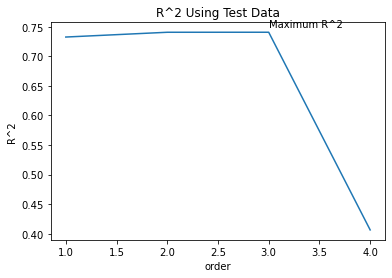

In [40]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

The following function will be used in the next section. Please run the cell below

In [41]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)


The following interface allows you to experiment with different polynomial orders and different amounts of data.

### We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.

In [43]:
pr1 = PolynomialFeatures(degree=2)

### Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".

In [44]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

### How many dimensions does the new feature have? Hint: use the attribute "shape".

In [45]:
x_train_pr1.shape

(110, 15)

In [46]:
x_test_pr1.shape

(91, 15)

### Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.

In [47]:
poly1 = LinearRegression().fit(x_train_pr,y_train)

## Part 3: Ridge Regression

In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [48]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Let's import Ridge from the module linear models.

In [49]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1

In [52]:
RigeModel = Ridge(alpha=1)

Like regular regression, you can fit the model using the method fit.

In [53]:
RigeModel.fit(x_train_pr,y_train)

Ridge(alpha=1)

Similarly, you can obtain a prediction:

In [54]:
pred = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:

In [55]:
print('predicted:', pred[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far

In [56]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.15it/s, Test Score=0.564, Train Score=0.859]


We can plot out the value of R^2 for different alphas:

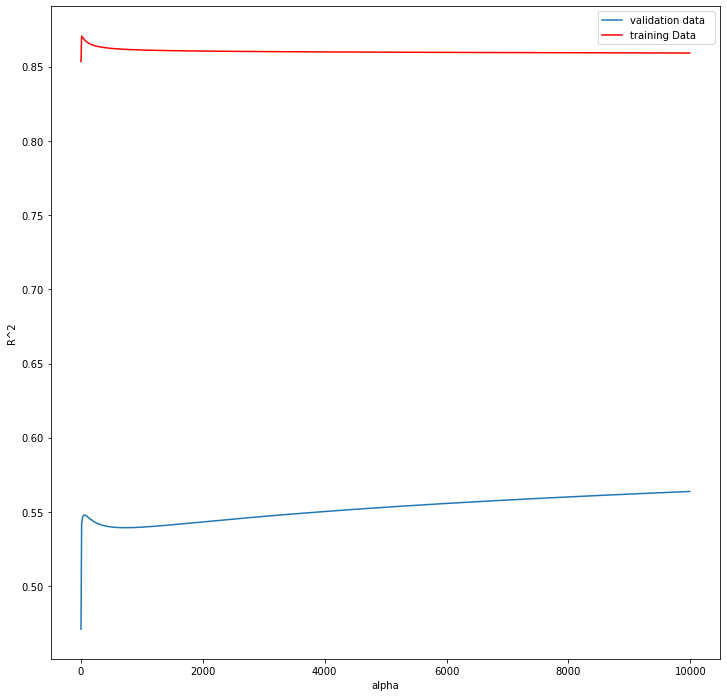

In [58]:
width = 12
height = 12
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure  represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

### Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

In [59]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr,y_test)

0.5418576440207269

## Part 4: Grid Search

The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection.

In [60]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:

In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Create a Ridge regression object:

In [62]:
RR = Ridge()
RR

Ridge()

Create a ridge grid search object:

In [63]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model:

In [64]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [65]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

We now test our model on the test data:

In [66]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

# The End